# Py6S
## Introdução
O modelo matemático 6S é baseado na transferência radiativa, onde ele considera as características atmosféricas no momento de obtenção da imagem para o cálculo dos fluxos necessários para a obtenção da reflectância bidirecional da superfície. <br>
A biblioteca Py6S é utilizada como interface para implementação do Modelo de Transferência Radiativa 6S. Ela é feita para ser simples e prática. Para instalar basta digitar:
```console
conda create -n py6s-env -c conda-forge py6s
conda activate py6s-env
```
Os comandos acima criam e ativam um ambiente virtual com todas dependências necessárias para utilizar a interface Py6S.

## Mas o que de fato é o 6S?
A Segunda Simulação do Sinal do Satélite no Espectro Solar, também conhecido como 6S, simula o efeito da atmosfera na luz que passa por ele e pode basicamente responder a duas perguntas:

---
***Qual intensidade de luz seria recebida em um satélite ou sensor sob um conjunto específico de condições de refletância atmosférica e terrestre?***

***Qual teria sido a refletância do solo, dada a medição da intensidade da luz em um sensor e as condições atmosféricas? (ou seja, o inverso da questão anterior)***

---
O 6S considera os efeitos provocados pela absorção causada por dióxido de carbono (CO<sub>2</sub>), ozônio (O<sub>3</sub>), óxido nitroso (N<sub>2</sub>O), oxigênio (O<sub>2</sub>), metano (CH<sub>4</sub>) e vapor d'água (H<sub>2</sub>O). Modelos como o 6S são frequentemente usados para corrigir imagens de satélite atmosféricas, como do LANDSAT por exemplo.<br>
Pensando agora no algoritmo em si, para a aplicação do código 6S é necessário especificar um conjunto de parâmetros, como:
- Atmospheric Profile
- Aerosol Profile
- Ground Reflectance
- Geometry
- Altitude
- Wavelength

Como retorno do algoritmo teremos os comprimentos de onda passados corrigidos. Para saber mais, você pode conferir o paper original sobre o 6S [aqui](http://www2.geog.ucl.ac.uk/~mdisney/teaching/PPRS/papers/vermote_etal_IEEE_1997.pdf).<br>

## Iniciando com Py6S

Para entendermos como funciona a biblioteca Py6S, começaremos um exemplo e uma explicação passo a passo. Observe o código a seguir.

Running for many wavelengths - this may take a long time


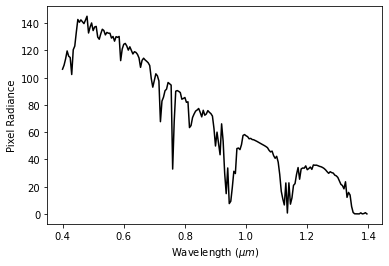

In [1]:
# Importe da lib do Py6S
from Py6S import *

# Cria um objeto SixS
# Talvez seja necessário especificar o path
s = SixS()

# Executa o algoritmo do 6S para comprimentos de onda na faixa do 
# infravermelho próximo visível
wavelengths, results = SixSHelpers.Wavelengths.run_vnir(s, output_name="pixel_radiance")

#Plota os resultados 
SixSHelpers.Wavelengths.plot_wavelengths(wavelengths, results, "Pixel Radiance")

Analisando o código acima já podemos entender como é a estrutura básica utilizada pela biblioteca: <br>
A classe <code>SixS</code> é principal ponto da biblioteca, possuindo atributos e métodos que permitem definir parâmetros, executar 6S e acessar as saídas. Em seguida, utilizamos a classe <code>SixSHelpers</code>. Nessa classe temos um conjunto de métodos "auxiliares" que foram escritos para tornar mais fácil realizar operações comuns usando Py6S. Com isso, selecionamos o conjunto de métodos <code>Wavelengths</code> e rodamos o algoritmo para comprimentos de onda na faixa do infravermelho próximo visível (por meio do método <code>run_vnir(s, output_name="pixel_radiance")</code>). Vale ressaltar que especificamos que queremos pegar a saída <code>pixel_radiance</code>.</br>
Por fim, utilizando esse conjunto de métodos <code>Wavelengths</code> fazemos o plot do resultado.

Vejamos agora um exemplo em que não usamos a classe <code>SixSHelpers</code>:

In [2]:
# Cria um objeto SixS
s = SixS()

# Atribui o perfil tropical ao parâmetro perfil atmosférico 
s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.Tropical)

# Atribui o comprimento 0.357 ao parâmetro comprimento de onda
s.wavelength = Wavelength(0.357)

# Executa o algoritmo
s.run()

# Printa o resultado
print(s.outputs.pixel_radiance)

59.344


No exemplo acima percebemos que é possível especificar os valores de conjunto de parâmetros, como foi tipo no tópico "Mas o que de fato é o 6S?". Além disso, é interessante notar que como passamos apenas 1 comprimento de onda, teremos apenas 1 valor de brilho de pixel como saída.

Outro ponto que pode ser de curiosidade do leitor é: mas quais são todos os parâmetros de retorno do 6S implementado na biblioteca Py6S? A saída do algoritmo pode ser acessada por meio do atributo ```s.outputs```, onde os valores são armazenados na forma de um dicionário Python. Para visualizar todos os valores basta fazer ```s.outputs.values```, como faríamos em um dicionário comum. Vejamos:

In [3]:
s.outputs.values

{'version': '1.1',
 'month': 7,
 'day': 14,
 'solar_z': 32,
 'solar_a': 264,
 'view_z': 23,
 'view_a': 190,
 'scattering_angle': 146.9,
 'azimuthal_angle_difference': 74.0,
 'visibility': 8.49,
 'aot550': 0.5,
 'ground_pressure': 1013.0,
 'ground_altitude': 0.0,
 'apparent_reflectance': 0.2316428,
 'apparent_radiance': 59.344,
 'total_gaseous_transmittance': 0.999,
 'wv_above_aerosol': 0.232,
 'wv_mixed_with_aerosol': 0.232,
 'wv_under_aerosol': 0.232,
 'percent_direct_solar_irradiance': 0.335,
 'percent_diffuse_solar_irradiance': 0.555,
 'percent_environmental_irradiance': 0.11,
 'atmospheric_intrinsic_reflectance': 0.0,
 'background_reflectance': 0.0,
 'pixel_reflectance': 0.232,
 'direct_solar_irradiance': 208.329,
 'diffuse_solar_irradiance': 344.735,
 'environmental_irradiance': 68.389,
 'atmospheric_intrinsic_radiance': 0.0,
 'background_radiance': 0.0,
 'pixel_radiance': 59.344,
 'solar_spectrum': 949.053}

Percebemos então que possuímos diversos parâmetros como retorno, saltando alguns como irradiância ambiental, refletância de pixel e refletância intrínseca atmosférica.

## Avançando com Py6S
Um das maiores utilidades da biblioteca Py6S é poder combinar a estrutura e código Python já conhecidos para aplicar o 6S a diversas situações e condições que desejamos. Por exemplo, caso queiramos aplicá-lo há diversas condições atmosféricas diferentes, podemos fazer de maneira simples:

In [4]:
s = SixS()

for param in [AtmosProfile.Tropical, AtmosProfile.MidlatitudeSummer, AtmosProfile.MidlatitudeWinter]:
  s.atmos_profile = AtmosProfile.PredefinedType(param)
  s.run()
  print(s.outputs.pixel_radiance)

134.955
134.632
134.249


Podemos também setar diversos parâmetros ao mesmo tempo:

In [5]:
s = SixS()
s.atmos_profile = AtmosProfile.UserWaterAndOzone(3.6, 0.9) # Set the atmosphere profile to be based on 3.6cm of water and 0.9cm-atm of ozone
s.wavelength = Wavelength(PredefinedWavelengths.LANDSAT_TM_B3) # Set the wavelength to be that of the Landsat TM Band 3 - includes response function
s.ground_reflectance = GroundReflectance.HomogeneousWalthall(1.08, 0.48, 4.96, 0.5) # Set the surface to have a BRDF approximated by the Walthall model
s.geometry = Geometry.Landsat_TM()
s.geometry.month = 7
s.geometry.day = 14
s.geometry.gmt_decimal_hour = 7.75
s.geometry.latitude = 51.148
s.geometry.longitude = 0.307
s.run()
print(s.outputs.pixel_radiance)

248.337


## Varrendo um set de parâmetros

Mas no caso em que estamos interessados em mais de um comprimento de onda? A biblioteca nos permite rodar simulações que cobreem um intervalo de parâmetros (como comprimento de onda).

Running for many wavelengths - this may take a long time


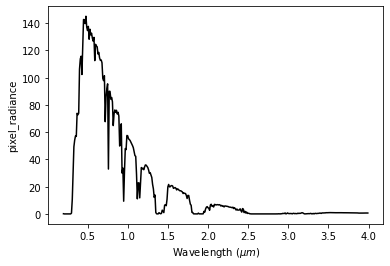

In [6]:
s = SixS()

# Simula todo o espectro de comprimentos de onda compatíveis com o SixS
wv, res = SixSHelpers.Wavelengths.run_whole_range(s, output_name='pixel_radiance')

# Plot da radiancia
SixSHelpers.Wavelengths.plot_wavelengths(wv, res, "pixel_radiance")

Também podemos simular faixas específicas do espéctro e com resoluções variadas

Running for many wavelengths - this may take a long time


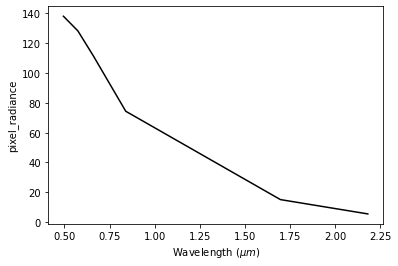

In [7]:
# Banda compativel com landsat
wv, res = SixSHelpers.Wavelengths.run_landsat_tm(s, output_name='pixel_radiance')

# Plot da radiancia
SixSHelpers.Wavelengths.plot_wavelengths(wv, res, "pixel_radiance")

Running for many wavelengths - this may take a long time


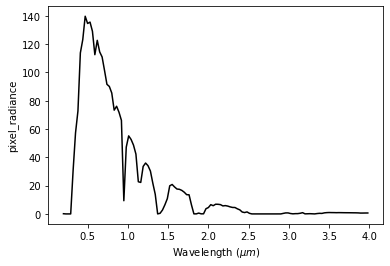

In [8]:
# Banda com resolucao reduzida
wv, res = SixSHelpers.Wavelengths.run_whole_range(s, spacing=0.030, output_name='pixel_radiance')

# Plot da radiancia
SixSHelpers.Wavelengths.plot_wavelengths(wv, res, "pixel_radiance")

## Função Wavelength
Essa função oferece uma forma simples de determinar bandas com diferentes _responde functions_ para uso nas simulações de 6S

```python
# Wavelength of 0.43 um
Wavelength (0.43)
# Band from 0.43 -0.50 um , with a flat response function of 1.0
Wavelength (0.43 , 0.50)
# Band from 0.4 -0.41 um , with a custom response function
Wavelength (0.400 , 0.410 , [0.7 , 0.9 , 1.0 , 0.3])
# A pre - defined sensor band wavelength
Wavelength ( PredefinedWavelengths . LANDSAT_TM_B1 )
```

## Mais sobre a classe SixS

A classe SixS é responsável por definir os parâmetros da simulação e rodá-la. O workflow padrão para criarmos uma simulação segue da seguinte maneira:

In [9]:
# Criar objeto SixS
s =  SixS()

# Setar profile e parametros
s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.Tropical)
s.wavelength = Wavelength(0.357)
# Rodar o modelo
s.run()

# Resultados

print(s.outputs.pixel_radiance)
print(s.outputs.background_radiance)
print(s.outputs.single_scattering_albedo)
print(s.outputs.transmittance_water.downward)

59.344
0.0
Rayleigh: 1.000000, Aerosol: 0.986440, Total: 0.993300
1.0


Podemos obter resultados de uma única simluação e extrair os resultados um por um. Mas também podemos rodar várias simulações com bandas diferentes usando `SixSHelpers.Wavelengths`.